In [21]:
# import blockchain
import hashlib as hs
import time 

def hash(target):
    proof = 1
    prev = 553
    start_time = time.perf_counter()
    while True:
        hash = hs.sha256(str(proof**2-prev**2).encode()).hexdigest()
        if str(hash).startswith('0'*target):
            end_time = time.perf_counter()
            tot_time = end_time-start_time
            print("Found target hash : {}".format(hash))
            print("Took {} s ".format(tot_time))
            print("Approx {} K Hashes /s".format((proof/tot_time)/1000))
            return [tot_time,proof]
        else:
            proof+=1

In [22]:
import numpy as np
f = open("hash.csv",'w')
abs_start = time.perf_counter()
for i in np.arange(15):
    dat = hash(target=i)
    t = time.perf_counter()-abs_start
    # Save to csv file in the format 
    # ABS time | hash target | time for this target | total number of hashes
    f.write("{},{},{},{}\n".format(t,i,dat[0],dat[1]))

Found target hash : f1489b0d0629a6af1b3bb553ad35c3d62c591ccbff8fe9cfb1659b16b982bff0
Took 8.95900302566588e-06 s 
Approx 111.61956270526818 K Hashes /s
Found target hash : 0fa168998ed7c8401f805bef15246bbdf688c9521f3be10dfd6a5553b441531f
Took 9.202994988299906e-06 s 
Approx 217.32055733407122 K Hashes /s
Found target hash : 005f9e95af7f45d97bf7a8e26443367bc697e6f15e155eefc16f576522449428
Took 0.0005468009985634126 s 
Approx 395.0248821188838 K Hashes /s
Found target hash : 000cf402b14373a542c08c26b074e4475cfa144029067cdd7e03b61909c07b2d
Took 0.008476549002807587 s 
Approx 674.213055113241 K Hashes /s
Found target hash : 00004a6cf4ea530f547284aa122607cbbd223dd92dd2a821f878b5b859dddee9
Took 0.11603947399999015 s 
Approx 722.7195807523835 K Hashes /s
Found target hash : 000004085e31584998af395764806b821fd7f80041196d923284b568b2a0dd0f
Took 3.410360446003324 s 
Approx 686.8215360476056 K Hashes /s
Found target hash : 000000e045b04566cb2095b14cd55ef650913c0f8d0791fad75dd05c22438769
Took 45.03

KeyboardInterrupt: 

In [23]:
f.close()

In [24]:
f = np.genfromtxt("hash.csv",delimiter=',')


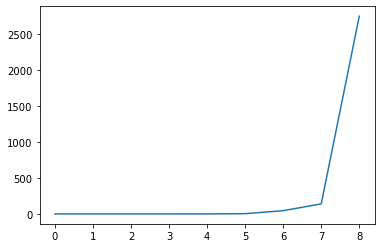

In [31]:
import matplotlib.pyplot as plt
t = f[:,2:3]
plt.plot(np.arange(9),t)
plt.show()